# Car Price Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['price'].describe().round(2)


count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

In [10]:
df=df.drop('car_ID',axis=1)

In [11]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Cleaning

In [12]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"Company",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [13]:
df.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
def replace(a,b):
    df["Company"].replace(a,b,inplace=True)

In [16]:
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [17]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Exploratory Data Analysis

In [18]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

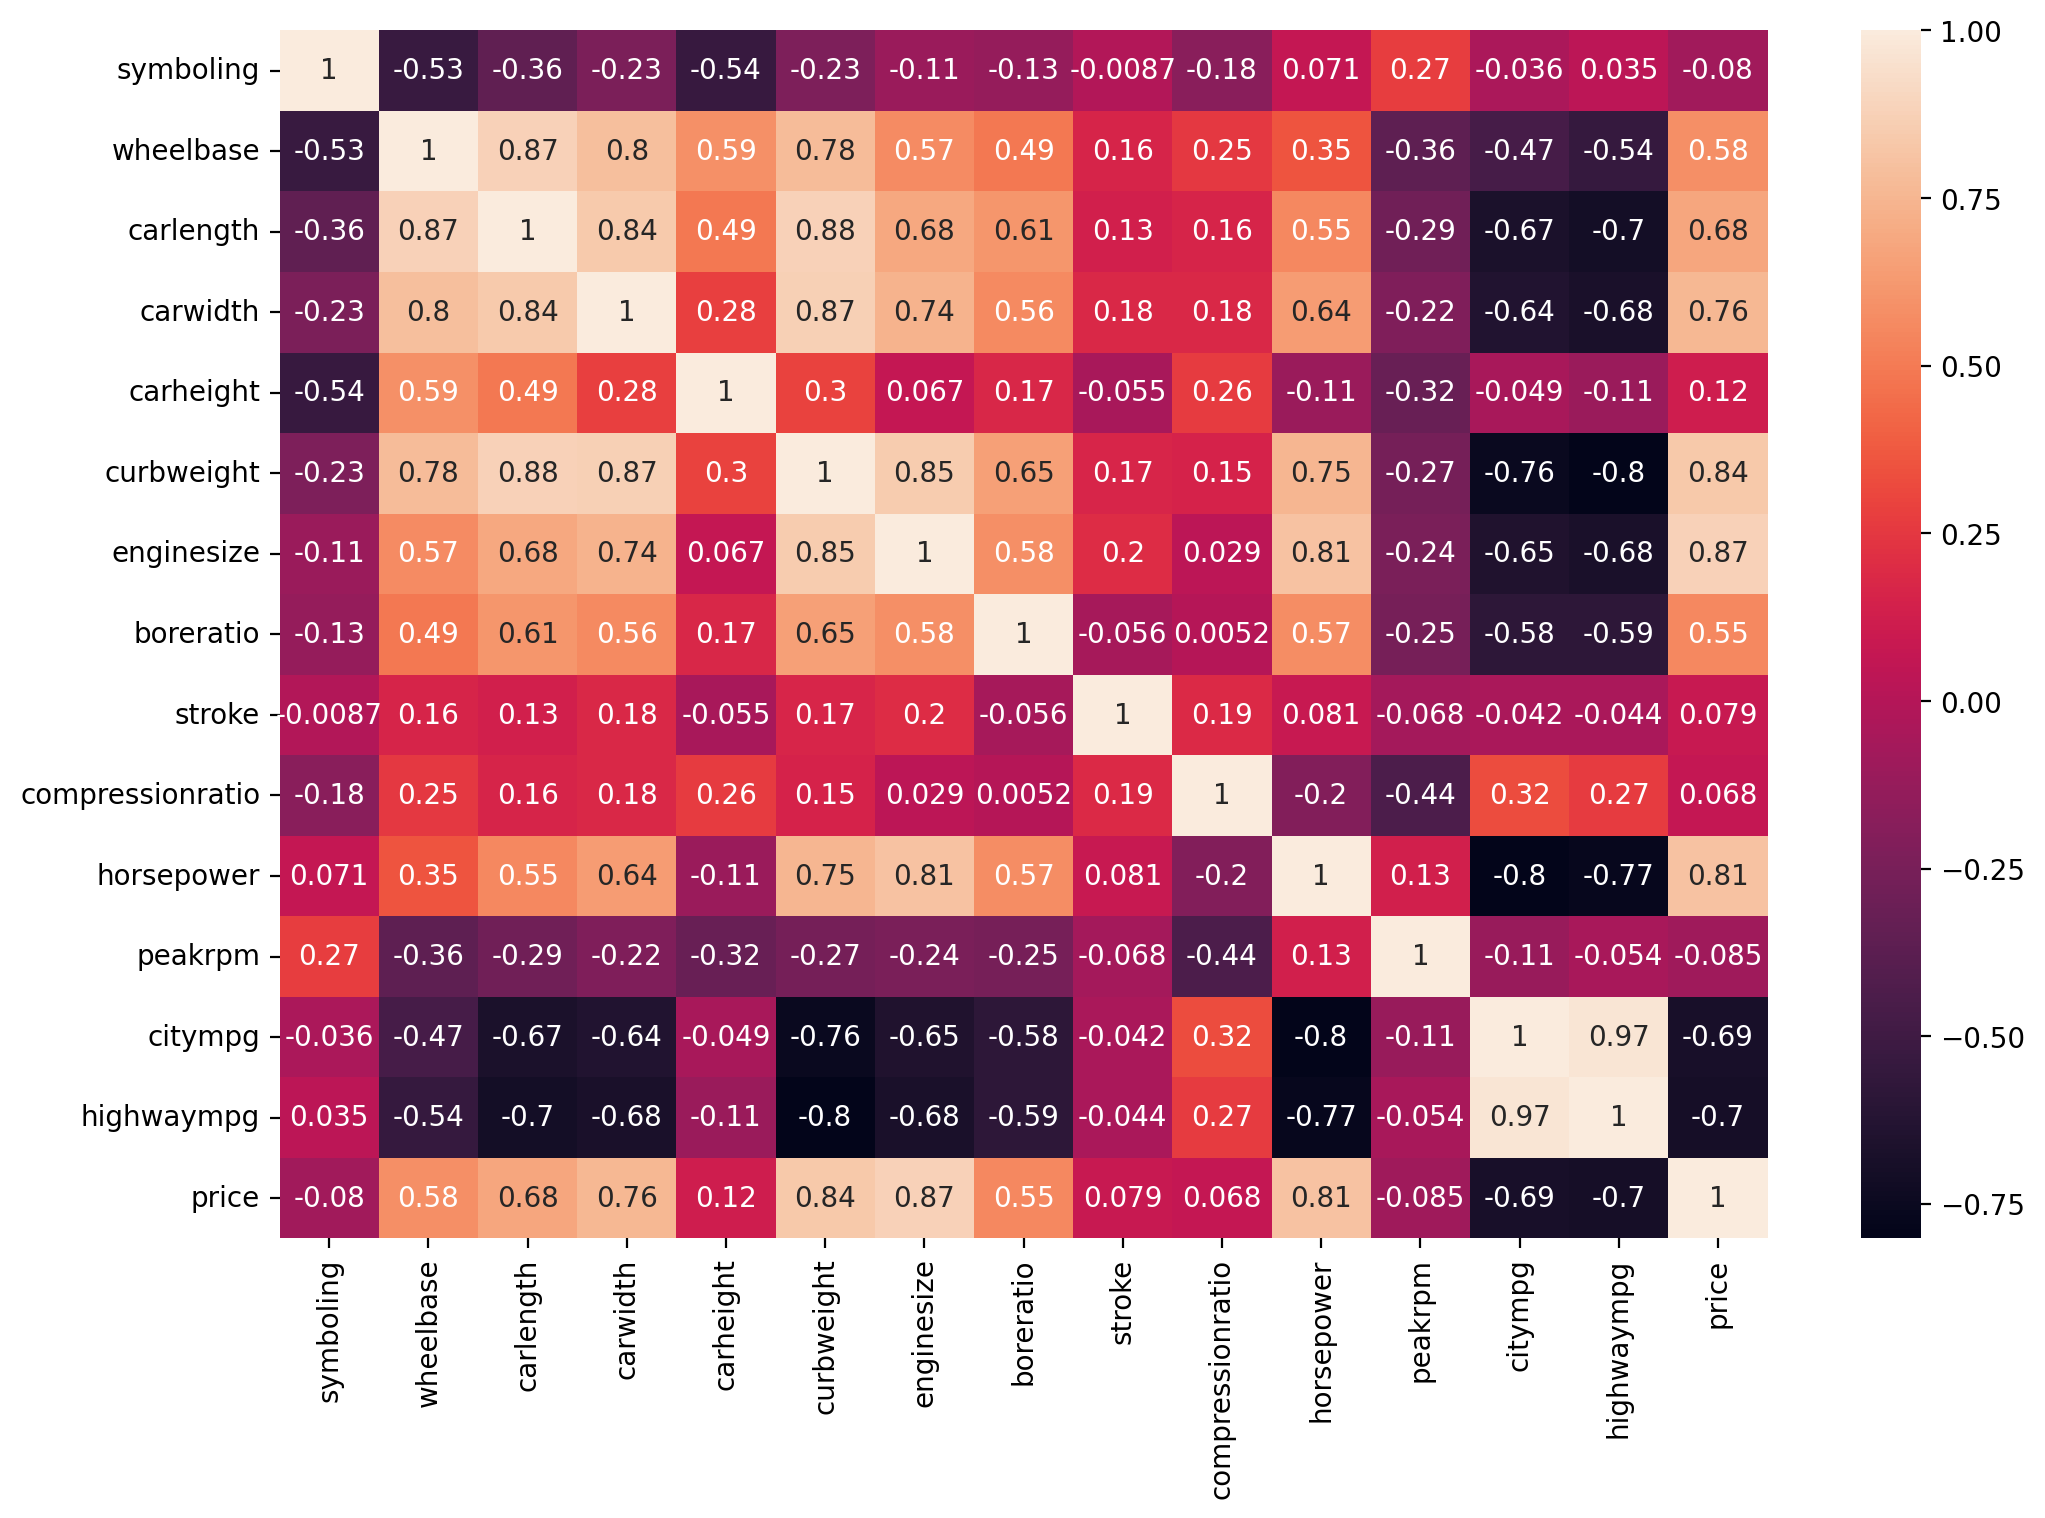

In [19]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

<Figure size 1200x800 with 0 Axes>

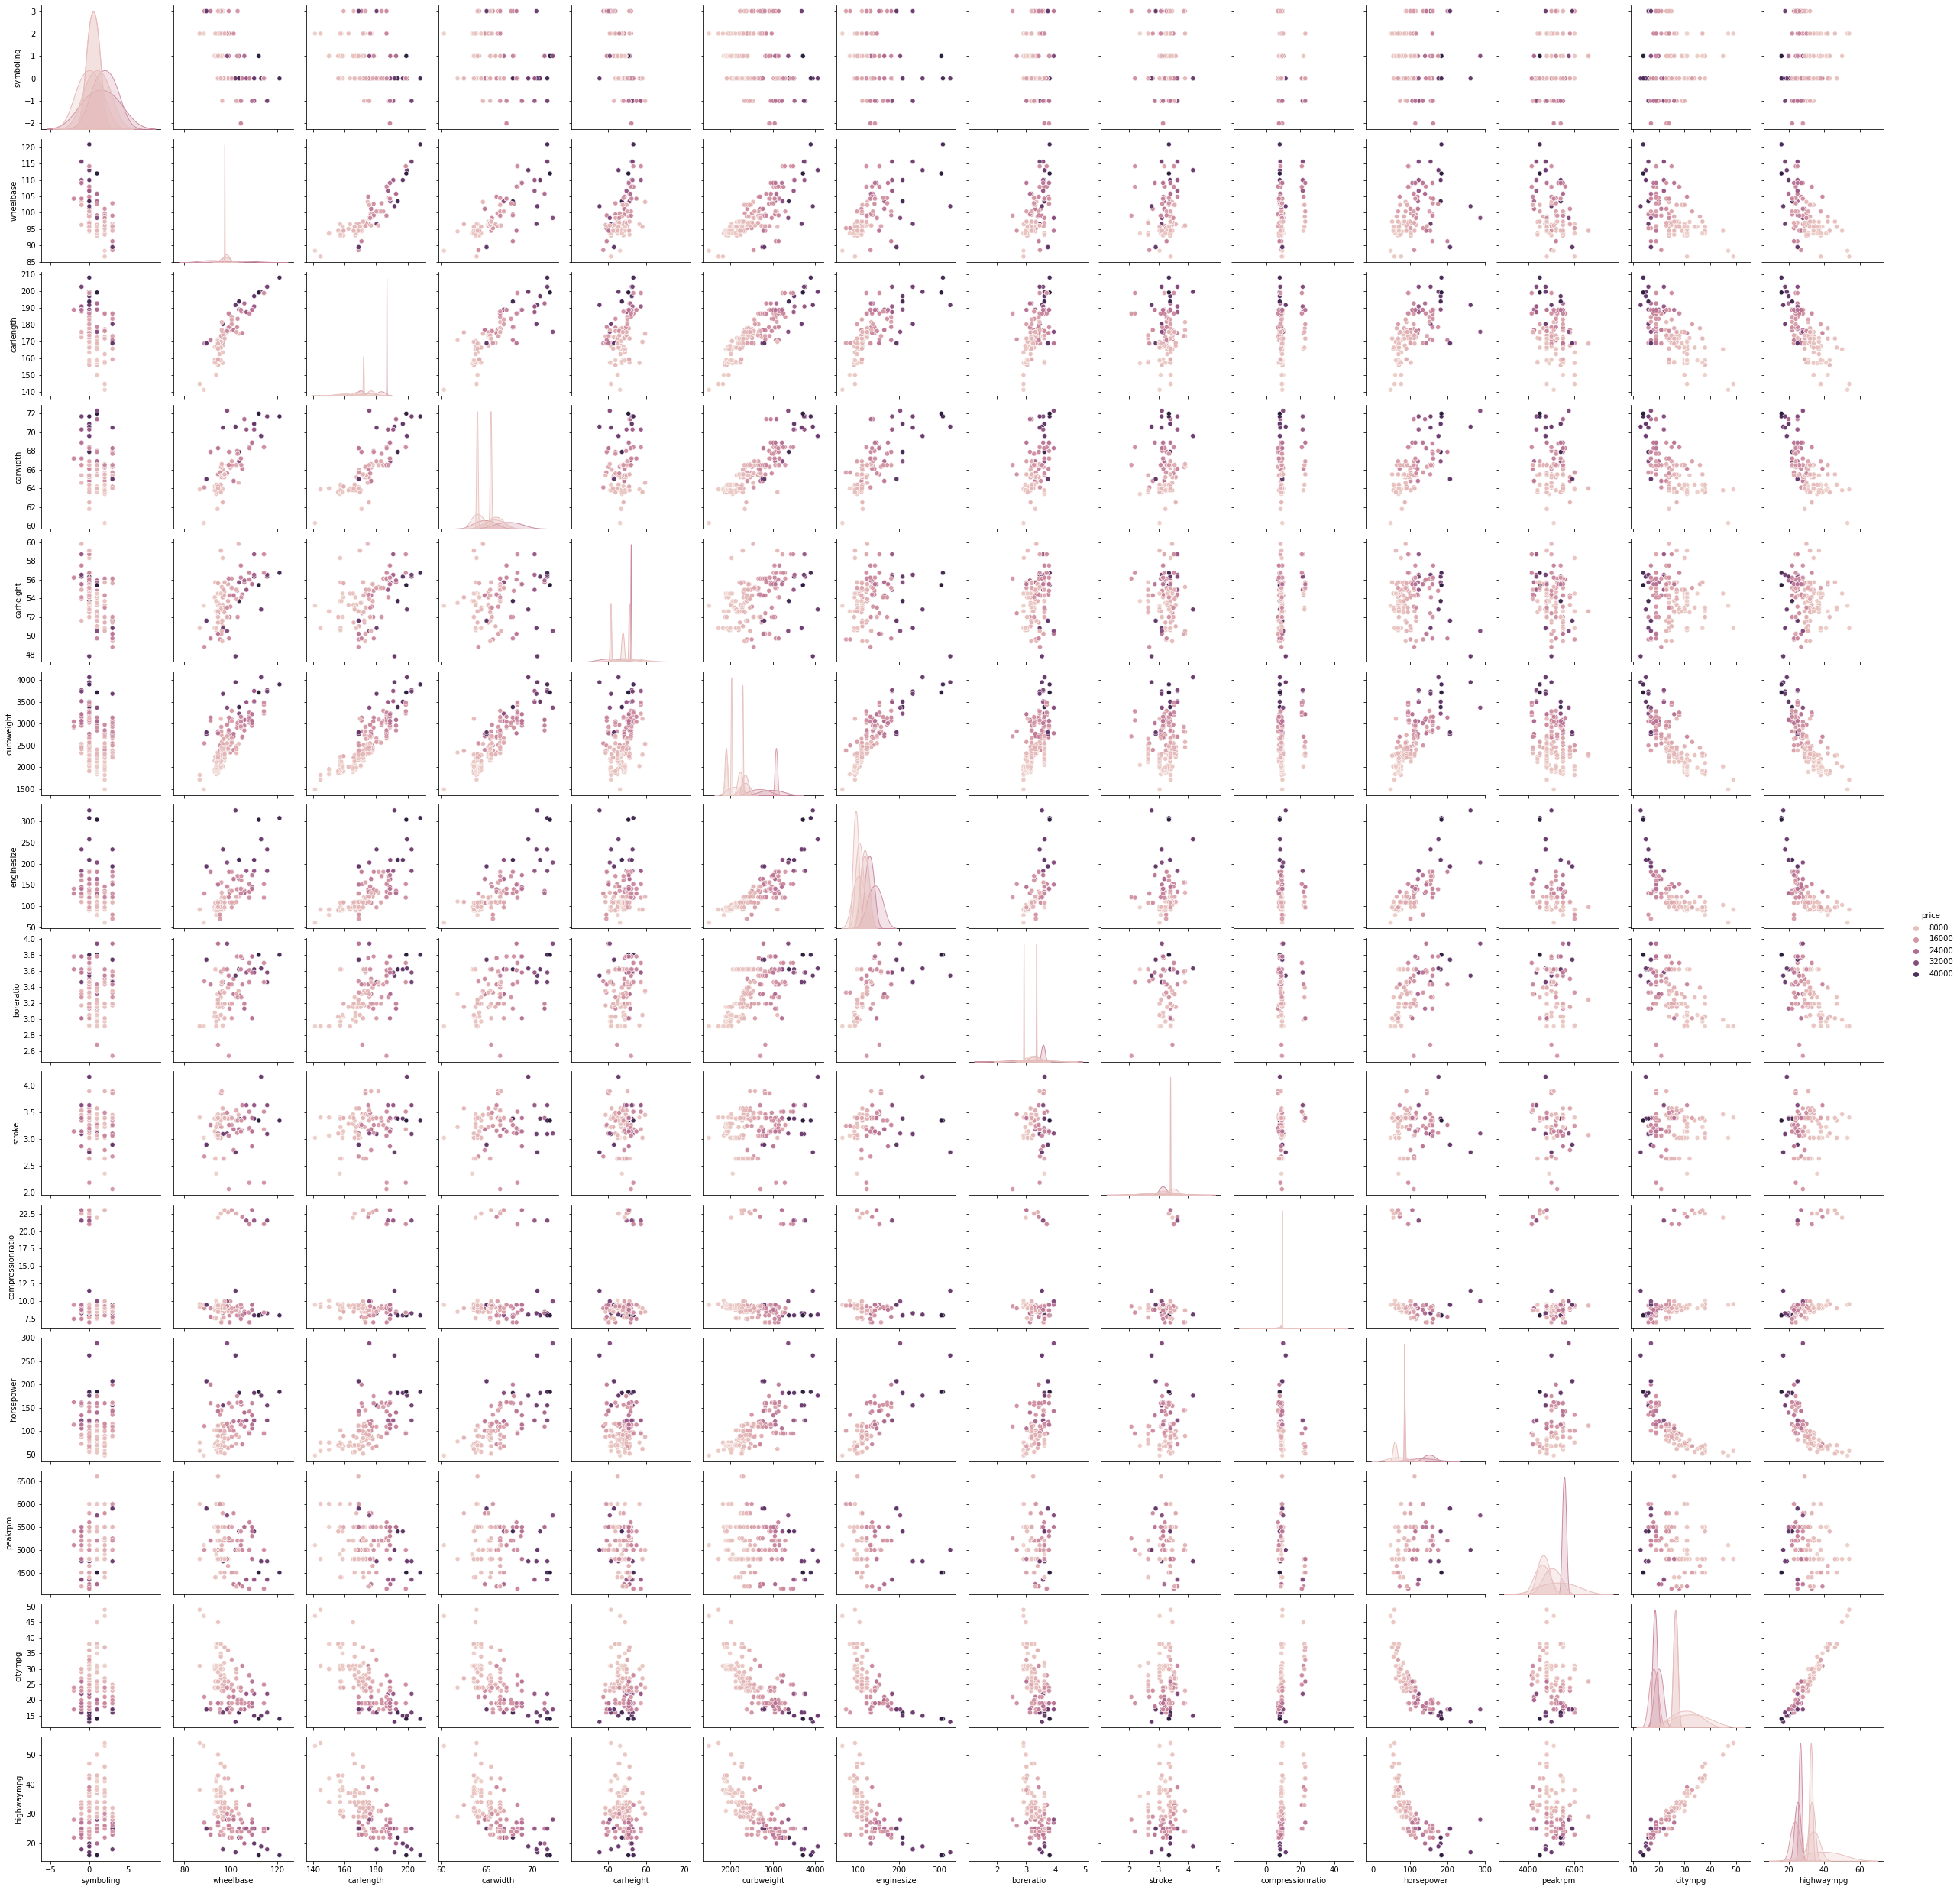

In [20]:
plt.figure(dpi=200)
sns.pairplot(df,hue='price')

### Plotting Price 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


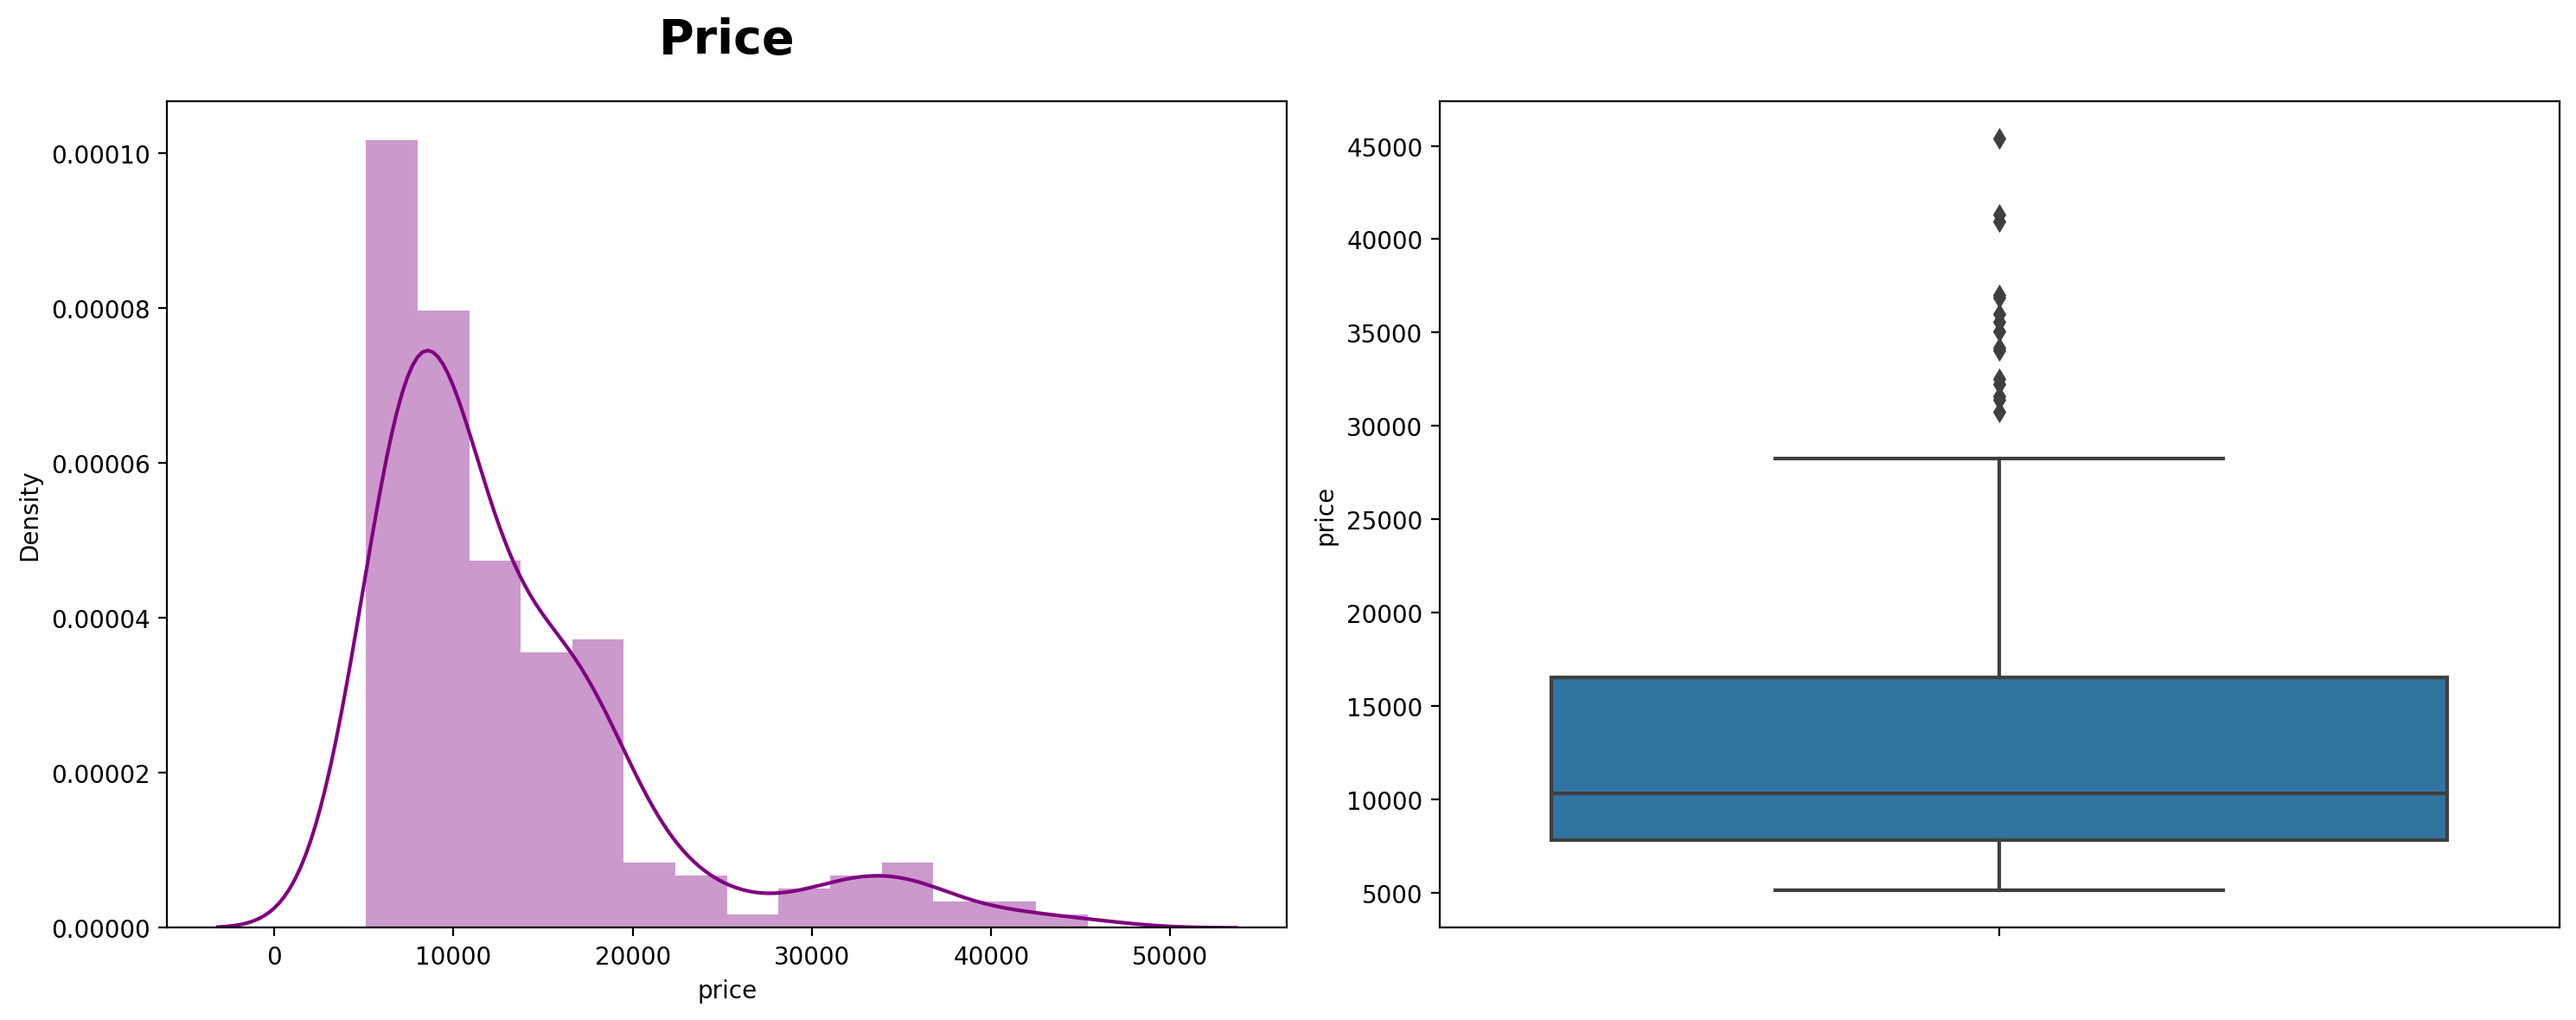

In [21]:
plt.figure(figsize=(15,6),dpi=200)
plt.subplot(1,2,1)
sns.distplot(df['price'],color='purple',kde=True)
plt.title('Price',fontsize=20,pad=20,fontweight='black')


plt.subplot(1,2,2)
sns.boxplot(y=df['price'])
plt.tight_layout()
plt.show()

### Plotting Company V/s rice

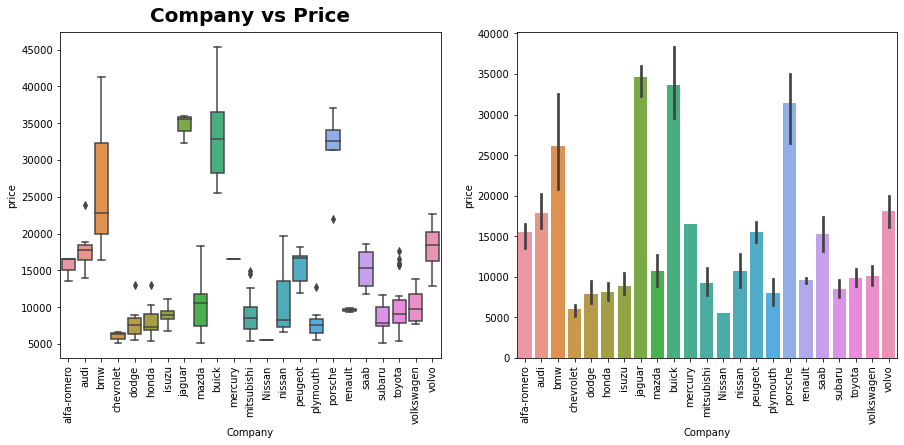

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="Company",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
sns.barplot(data=df,x=df['Company'],y=df['price'])
plt.xticks(rotation=90);

### Plotting Categorical Features

In [23]:
def categories(cols):
    plt.figure(figsize=(12,6),dpi=200)
    plt.subplot(1,2,1)
    sns.countplot(data=df,x=cols,order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontsize=20,fontweight='black')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=cols,y='price')
    plt.title(f"{cols} V/s Price",pad=10,fontsize=20,fontweight='black')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

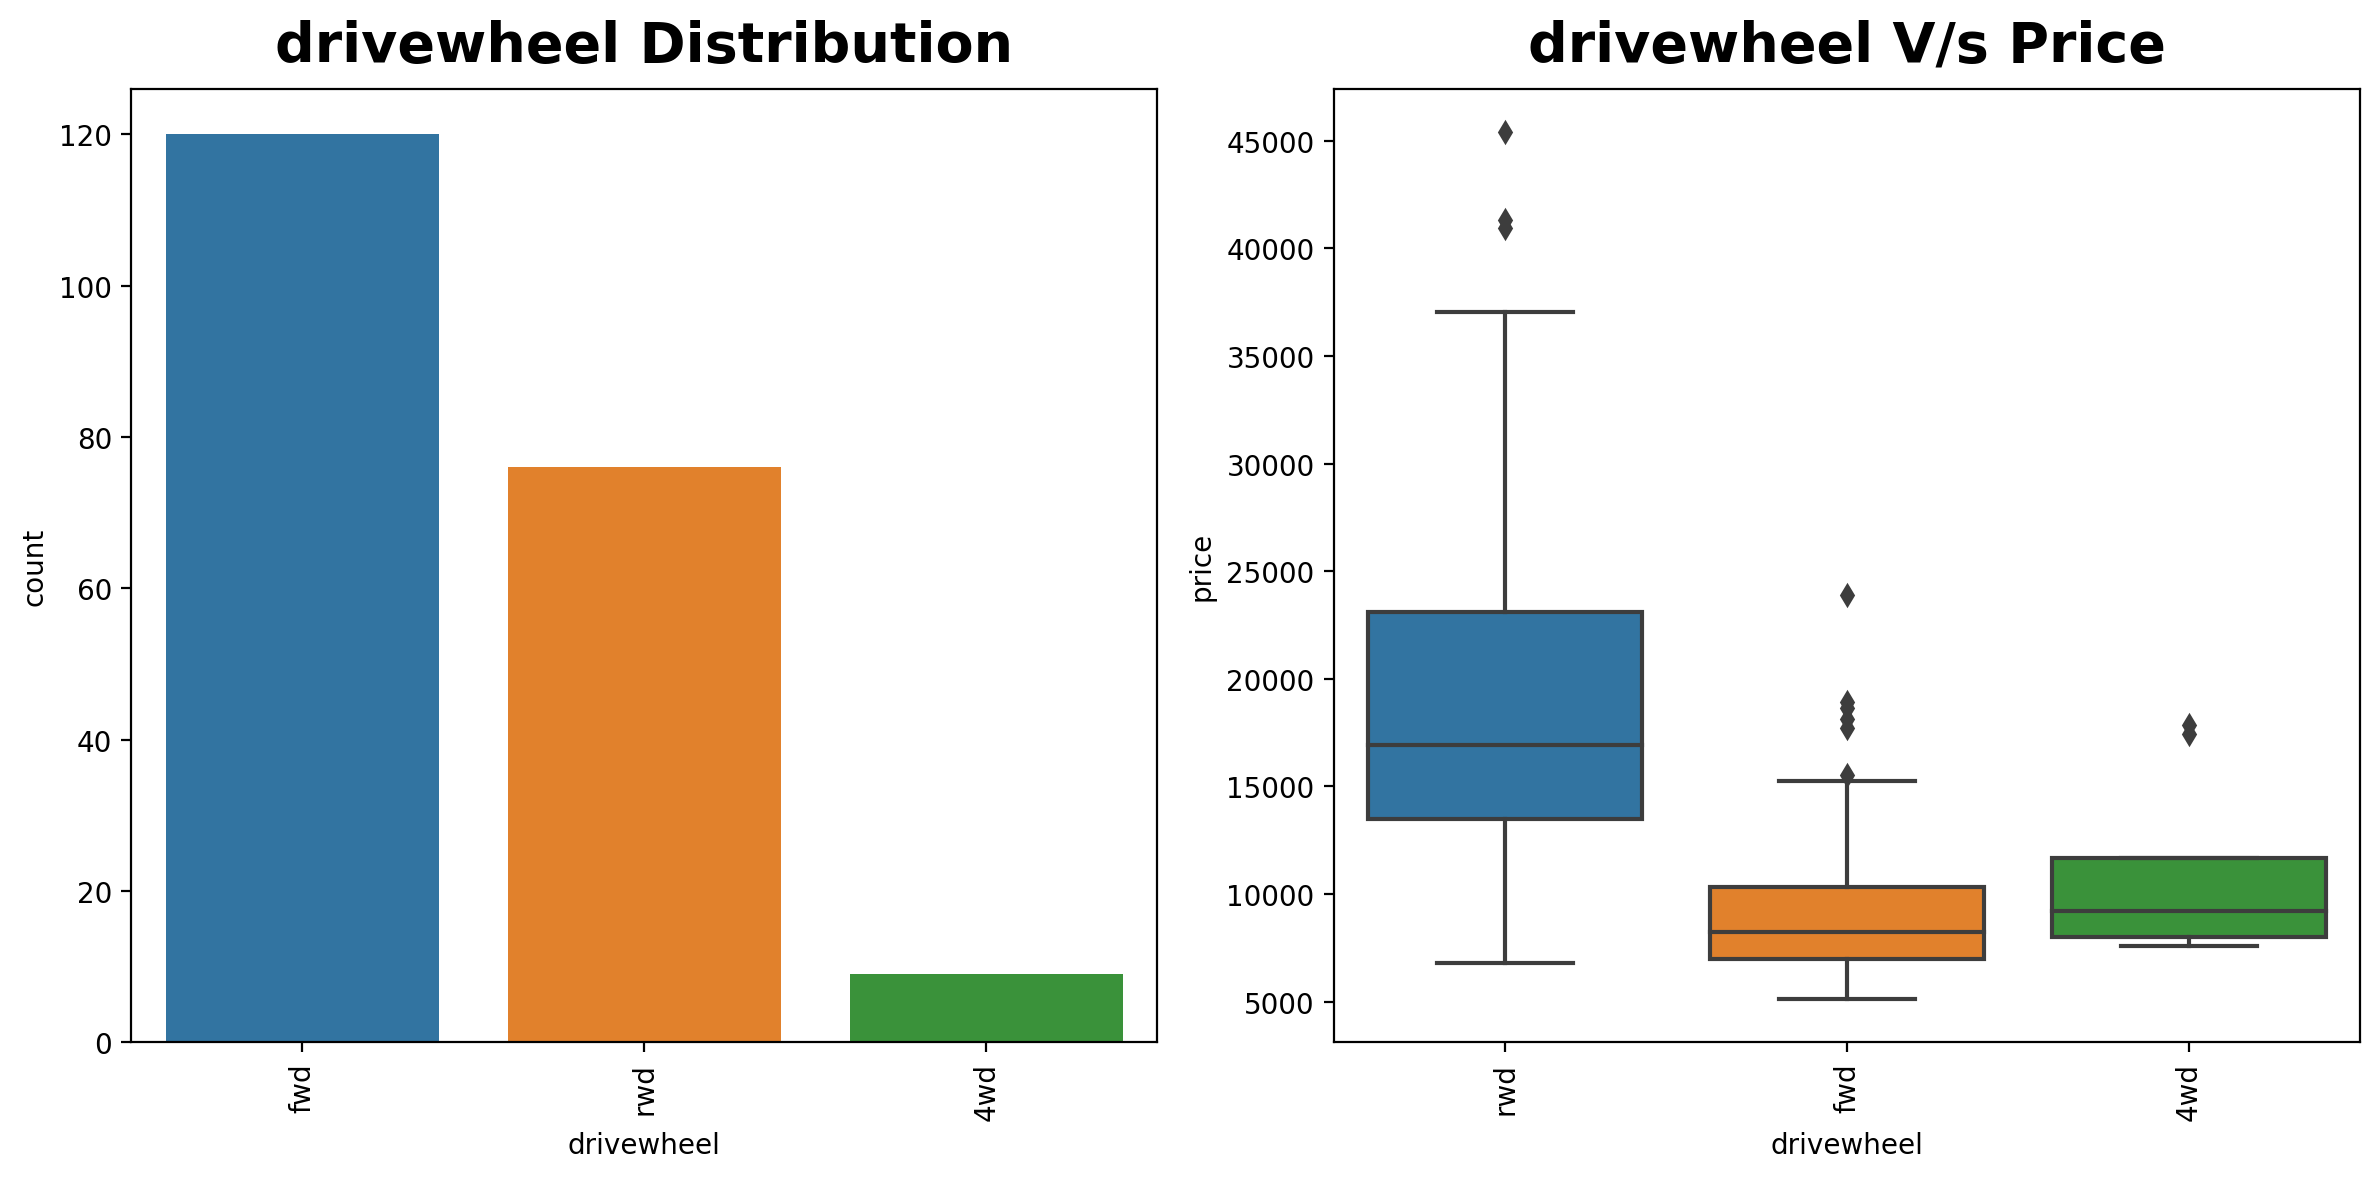

In [24]:
categories('drivewheel')

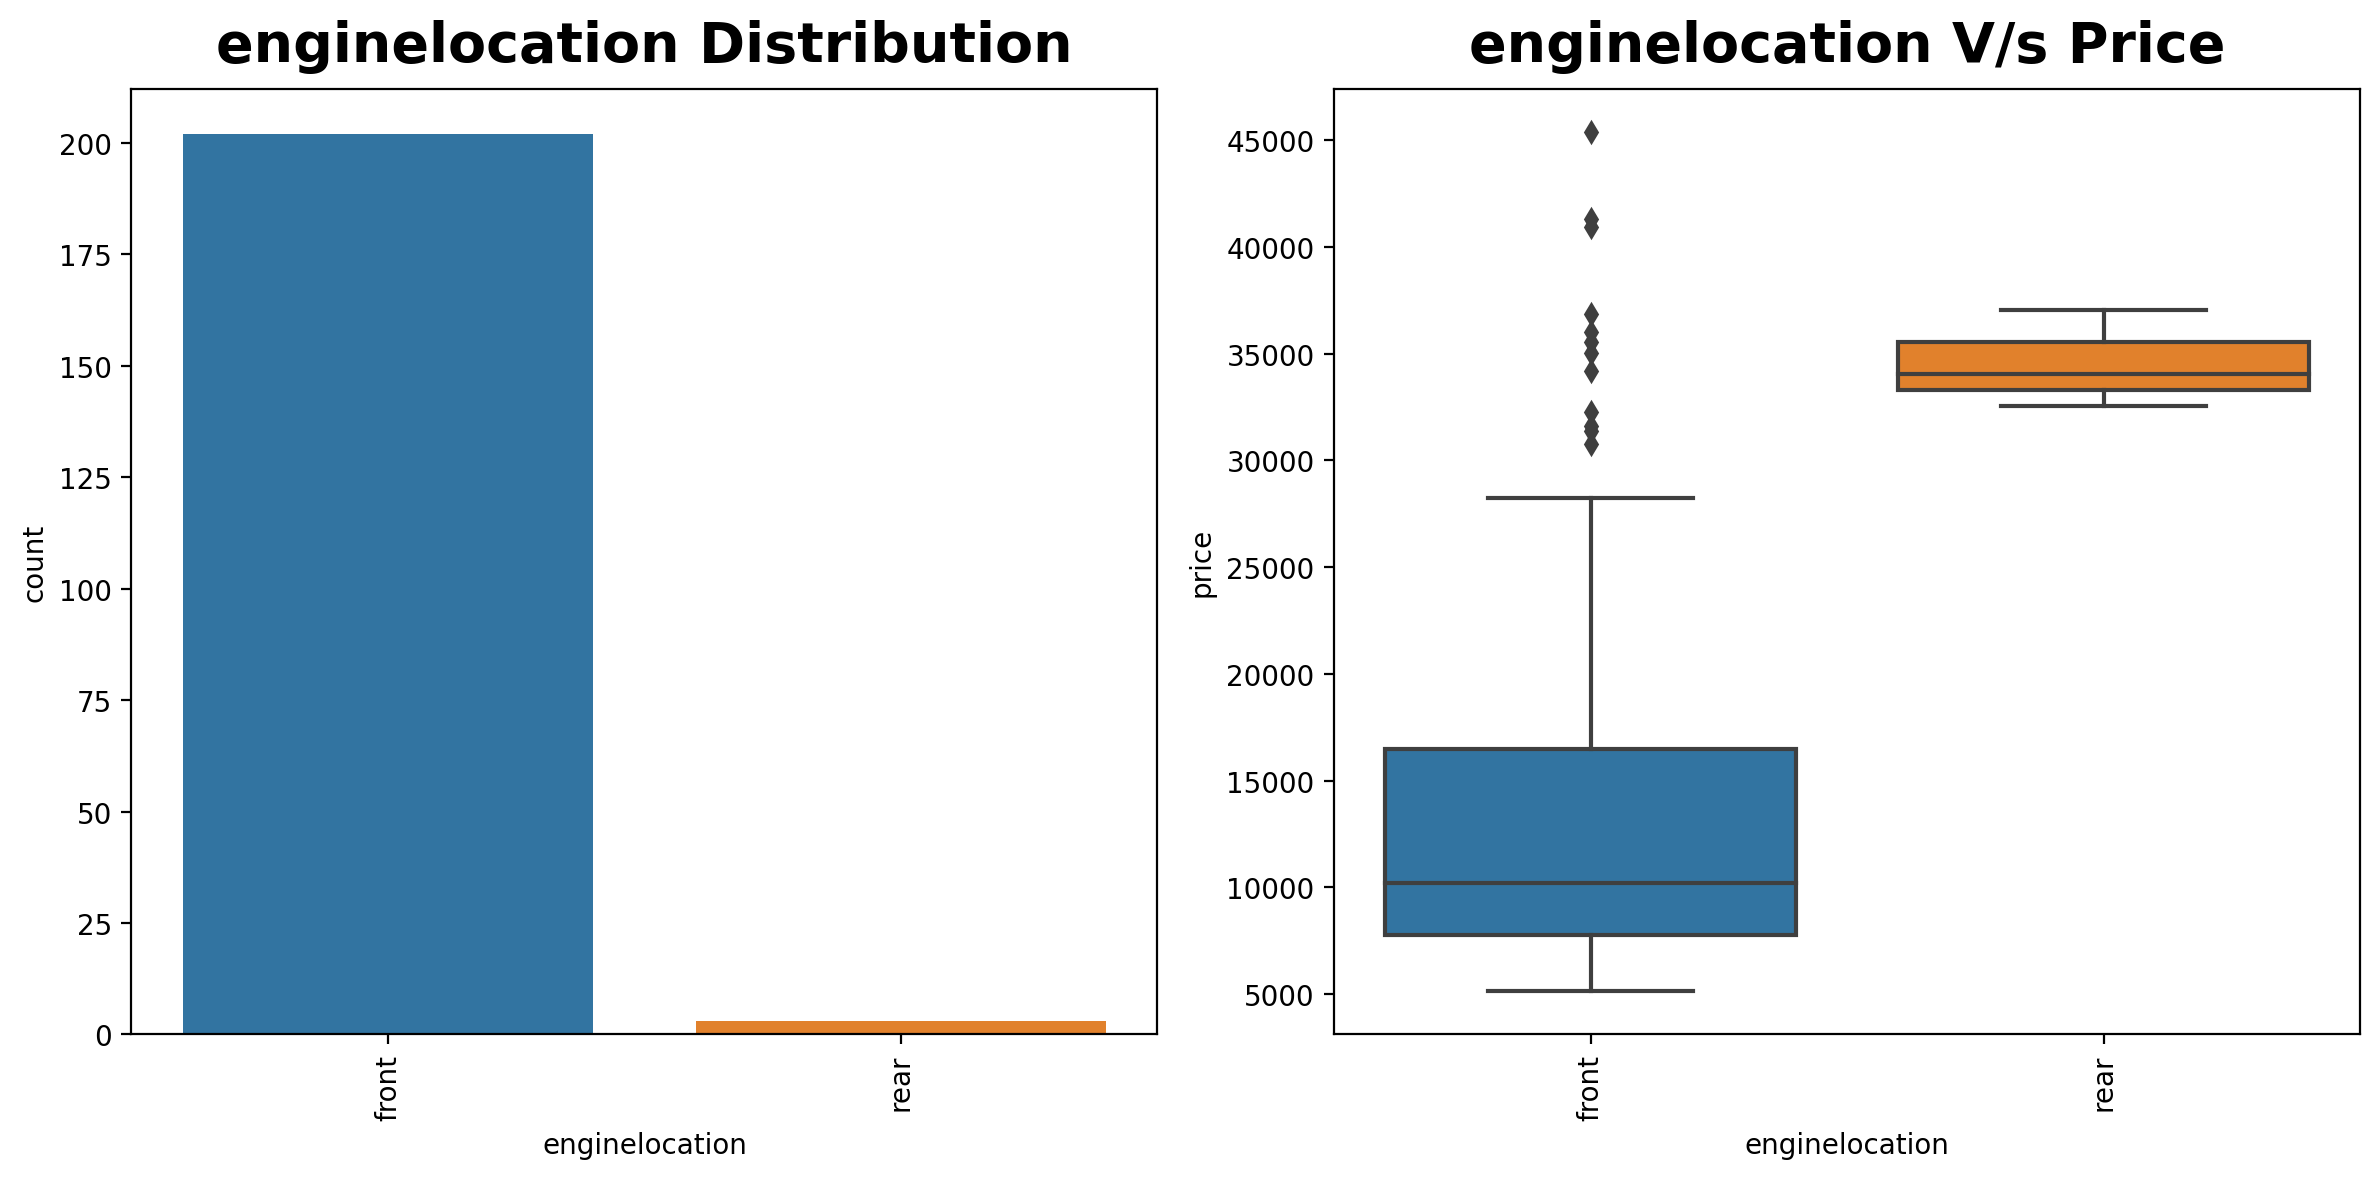

In [25]:
categories('enginelocation')

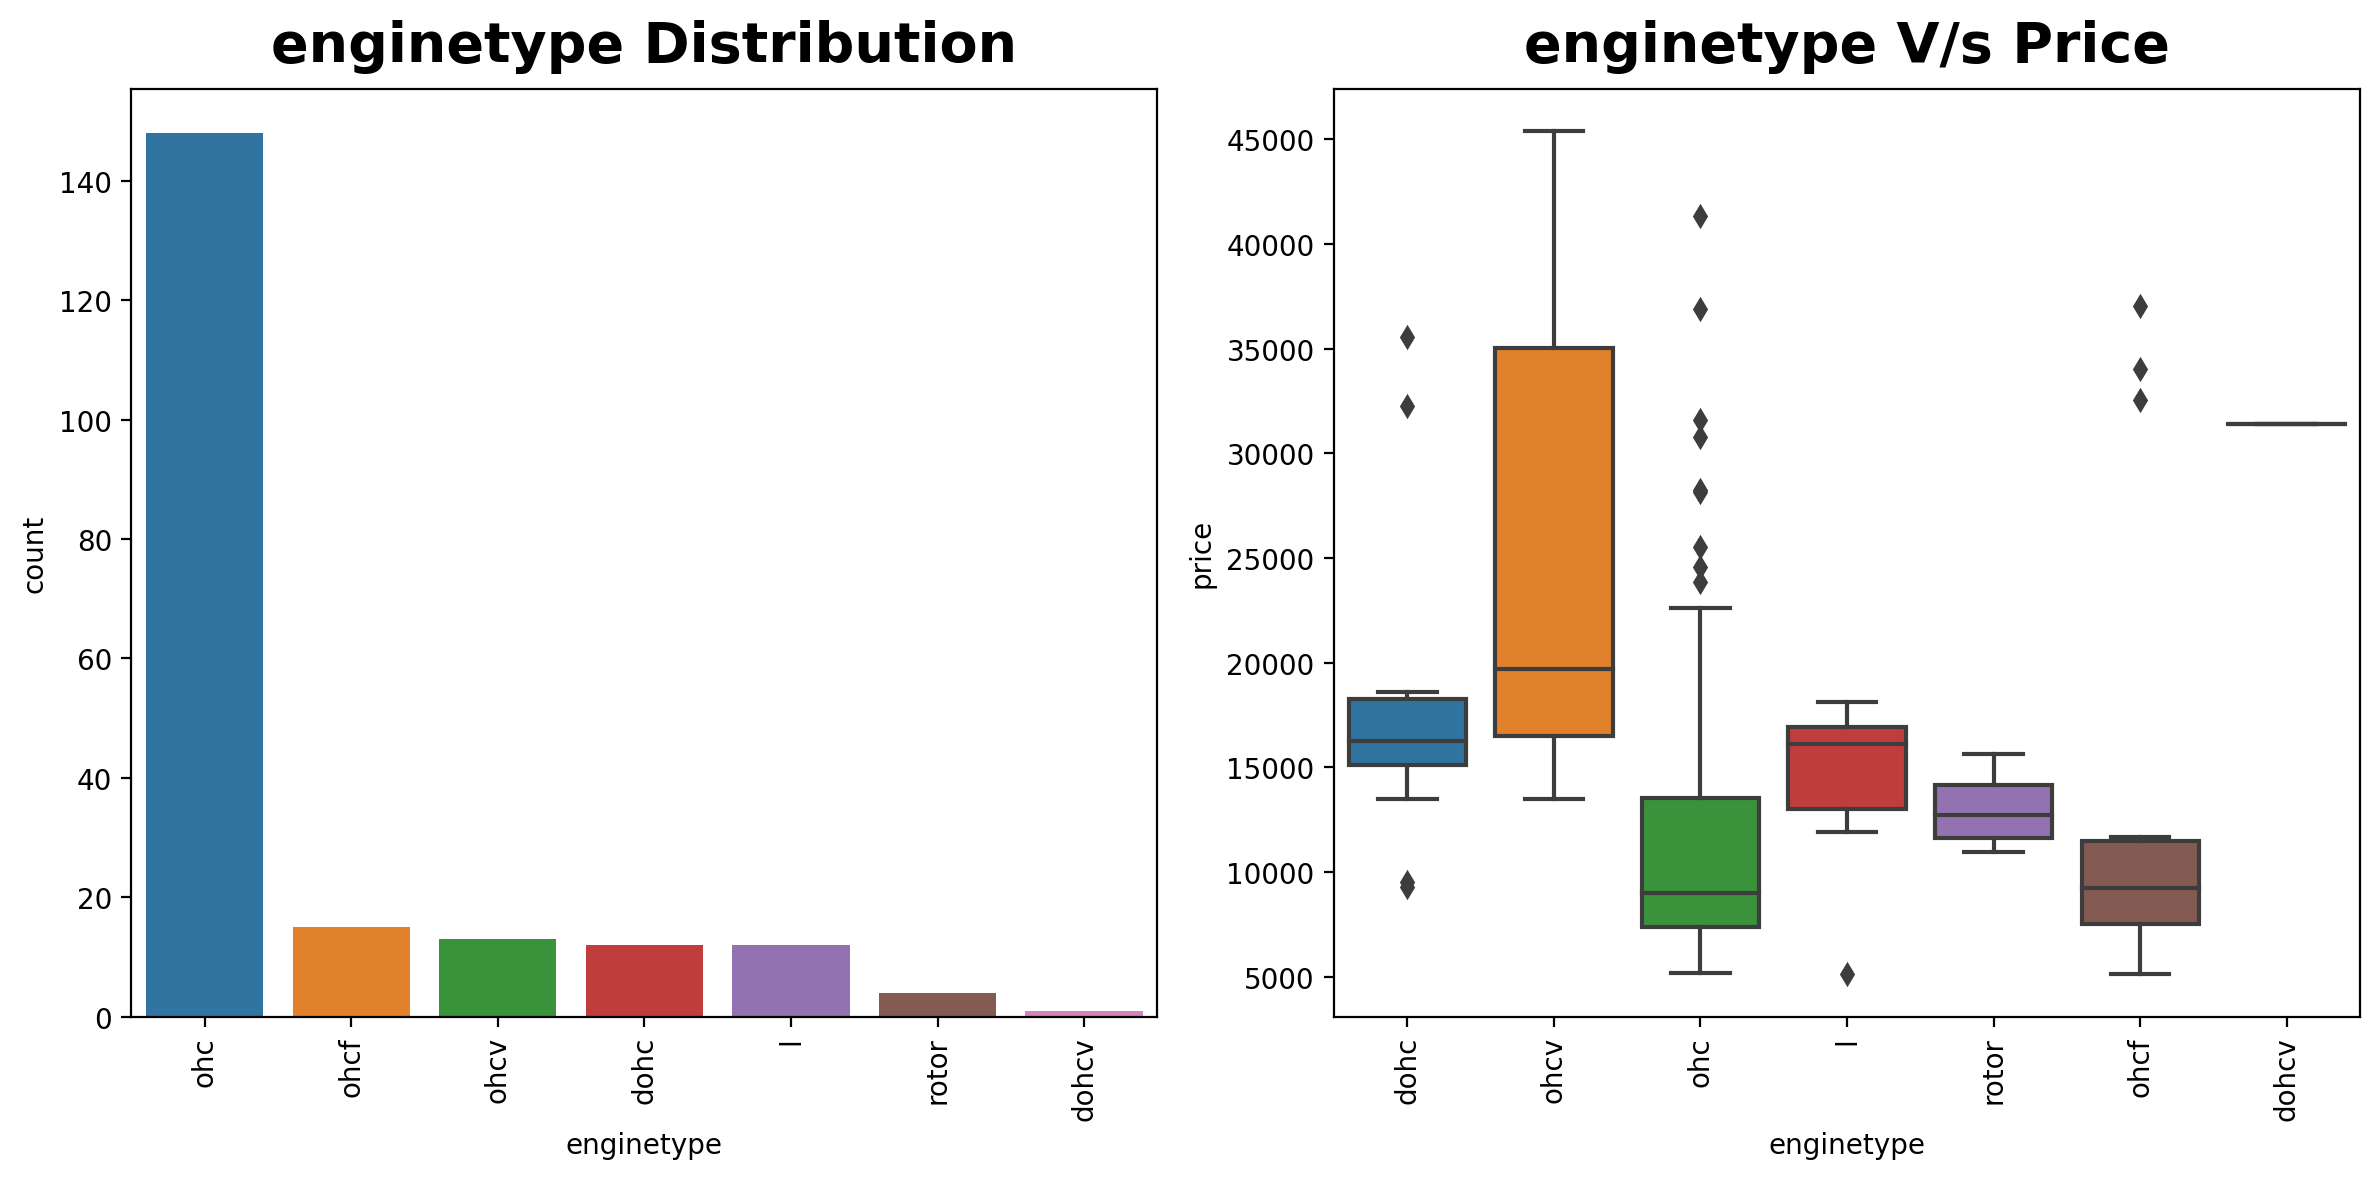

In [26]:
categories('enginetype')

In [27]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,color="orange")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

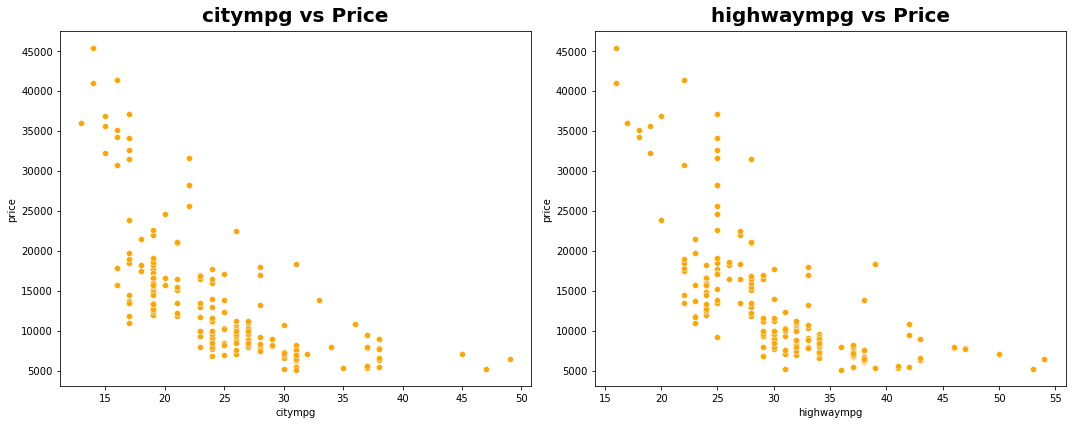

In [28]:
scatter_plot(["citympg","highwaympg"])

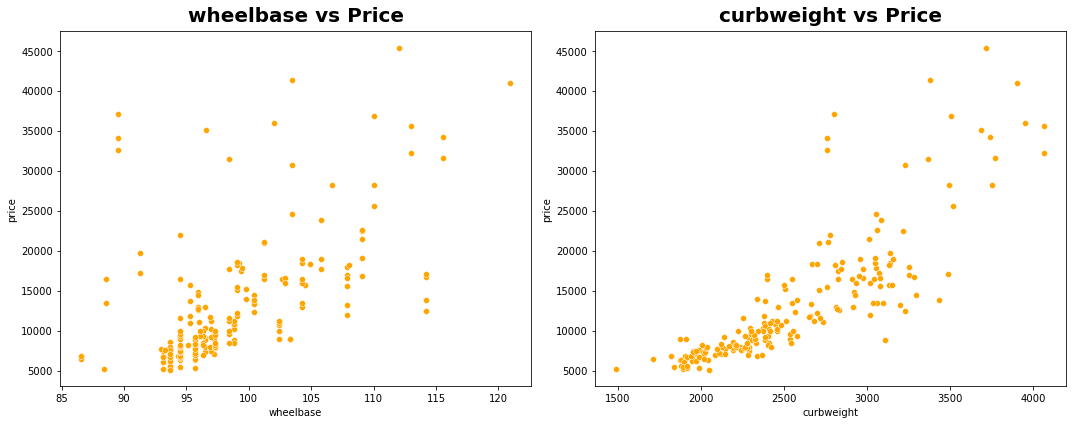

In [29]:
scatter_plot(["wheelbase","curbweight"])

In [30]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="green")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

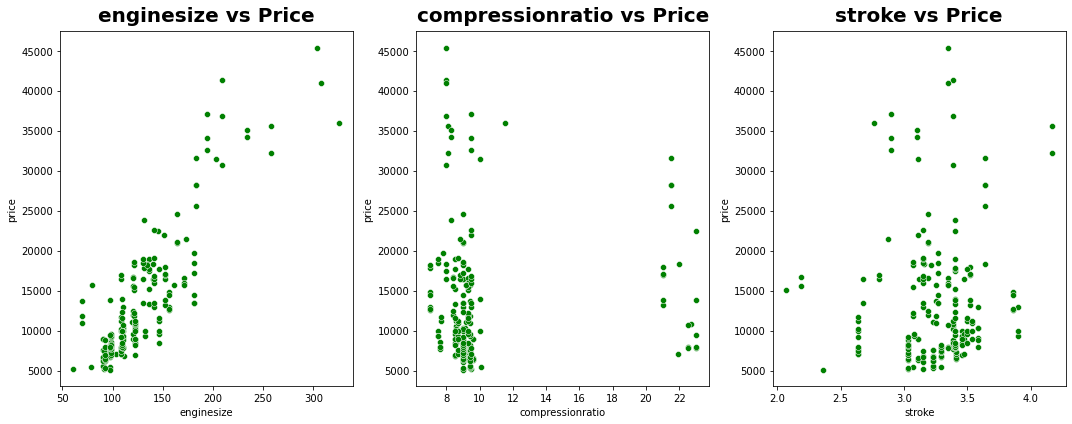

In [31]:
scatter_plot(["enginesize","compressionratio","stroke"])

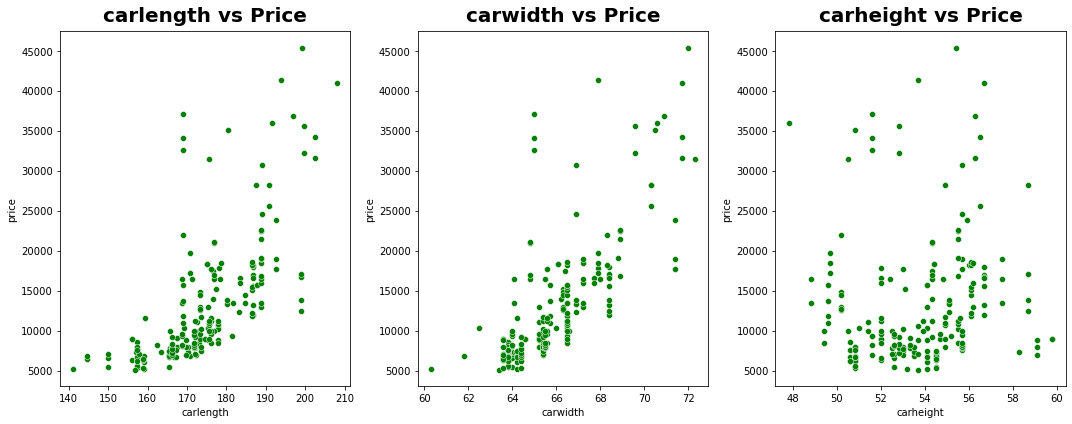

In [32]:
scatter_plot(['carlength','carwidth','carheight'])

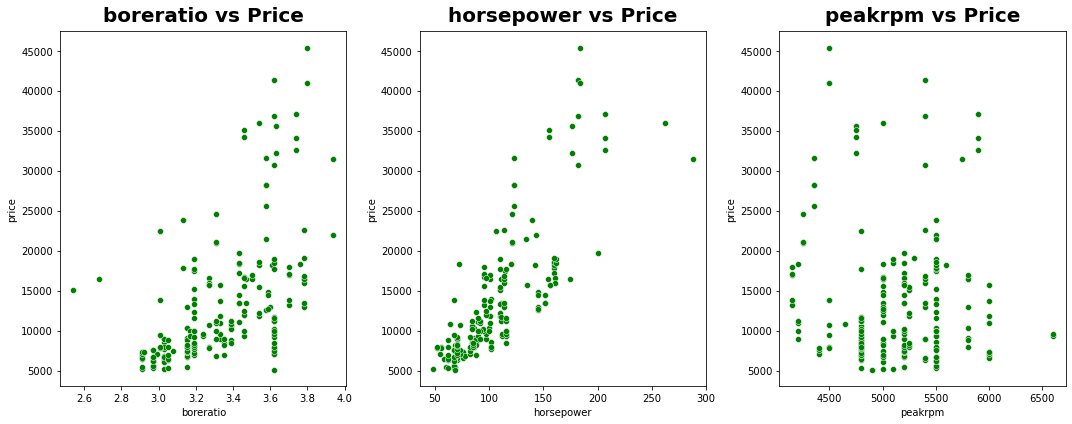

In [33]:
scatter_plot(["boreratio","horsepower","peakrpm"])

# Building a Machine Learning Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [35]:
obj=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

encoder=LabelEncoder()
for i in range(0,obj.shape[1]):
        obj.iloc[:,i] = encoder.fit_transform(obj.iloc[:,i])    

In [36]:
obj.dtypes

Company           int32
fueltype          int32
aspiration        int32
doornumber        int32
carbody           int32
drivewheel        int32
enginelocation    int32
enginetype        int32
cylindernumber    int32
fuelsystem        int32
dtype: object

In [37]:
full=pd.concat([num,obj],axis=1)

In [38]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
 15  Company           205 non-null    int32  
 16  fueltype          205 non-null    int32  
 1

In [39]:
full.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
Company            -0.249695
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [40]:
data1=full[["highwaympg","citympg","Company",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength',
            'carwidth','horsepower','curbweight','enginesize','price']]

data1.head()

,highwaympg,citympg,Company,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,1,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,1,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,2,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,2,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [41]:
X=data1.drop('price',axis=1)
y=data1['price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)

In [43]:
lr_model=LinearRegression()
dtr_model=DecisionTreeRegressor()
rfr_model=RandomForestRegressor()
knn_model=KNeighborsRegressor()

In [44]:
model_list=[lr_model,dtr_model,rfr_model,knn_model]
MAE=[]
RMSE=[]
r2_scores=[]
for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        mae=mean_absolute_error(y_test,pred)
        rmse=np.sqrt(mean_squared_error(y_test,pred))
        r2=r2_score(y_test,pred)*100
        MAE.append(mae)
        RMSE.append(rmse)
        r2_scores.append(r2)

In [45]:
MAE

[2187.2313946505865, 2411.672048387097, 1542.0130456989248, 2068.587629032258]

In [46]:
RMSE

[2704.07035209341, 3560.5728434365114, 2325.627806933008, 3132.912785436749]

In [47]:
r2_scores

[88.25368227457876, 79.63401023611499, 91.31147222177242, 84.23251665103577]

# Scaling the data

In [48]:
data1.head()

,highwaympg,citympg,Company,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,1,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,1,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,2,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,2,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [49]:
sc_data=data1.copy()

In [50]:
sc_data

,highwaympg,citympg,Company,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,1,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,1,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,2,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,2,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,28,23,22,0,5,3.78,109.1,2,188.8,68.9,114,2952,141,16845.0
201,25,19,22,0,5,3.78,109.1,2,188.8,68.8,160,3049,141,19045.0
202,23,18,22,0,5,3.58,109.1,2,188.8,68.9,134,3012,173,21485.0
203,27,26,22,0,3,3.01,109.1,2,188.8,68.9,106,3217,145,22470.0


In [51]:
A=sc_data.drop('price',axis=1)
b=sc_data['price']

In [52]:
scaler=StandardScaler()
scaled_A=scaler.fit_transform(A)

In [53]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(A, b, train_size=0.7)

In [54]:
model_list=[lr_model,dtr_model,rfr_model,knn_model]
MAE_s=[]
RMSE_s=[]
r2_scores_s=[]
for model in model_list:
        model.fit(X_train_s,y_train_s)
        pred=model.predict(X_test_s)
        mae_s=mean_absolute_error(y_test_s,pred)
        rmse_s=np.sqrt(mean_squared_error(y_test_s,pred))
        r2_s=r2_score(y_test_s,pred)*100
        MAE_s.append(mae_s)
        RMSE_s.append(rmse_s)
        r2_scores_s.append(r2_s)

In [55]:
MAE_s

[2099.7895790029593, 1658.6666612903225, 1439.1844354838709, 2293.100532258064]

In [56]:
RMSE_s

[2676.513078036294, 2430.235894178392, 2102.7328452549677, 3311.63657374409]

In [57]:
r2_scores_s

[84.78889209092644, 87.45938111132577, 90.61162766959046, 76.71332680663407]

# Plotting Metrics

Text(0.5, 1.0, 'After Scaling')

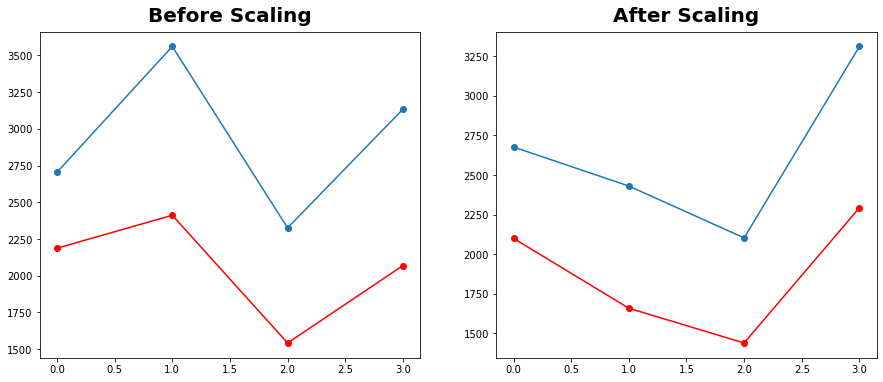

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(MAE,marker='o',color='red')
plt.plot(RMSE,marker='o')
plt.title('Before Scaling',pad=10,fontsize=20,fontweight='black')

plt.subplot(1,2,2)
plt.plot(MAE_s,marker='o',color='red')
plt.plot(RMSE_s,marker='o')
plt.title('After Scaling',pad=10,fontsize=20,fontweight='black')


Text(0.5, 1.0, 'After Scaling')

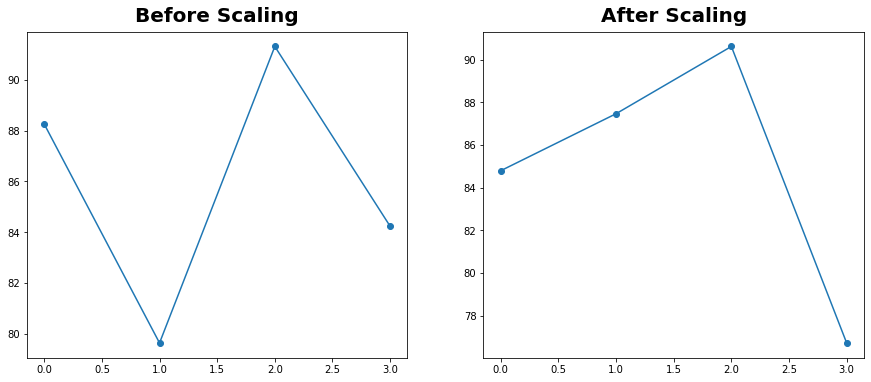

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(r2_scores,marker='o')
plt.title('Before Scaling',pad=10,fontsize=20,fontweight='black')

plt.subplot(1,2,2)
plt.plot(r2_scores_s,marker='o')
plt.title('After Scaling',pad=10,fontsize=20,fontweight='black')

# Dataframe of Metrics

In [60]:
pd.DataFrame({'Models':['Linear Regressor','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor'],
              'MAE':MAE,
              'RMSE':RMSE,
              'r2_score':r2_scores,
              'MAE_s':MAE_s,
              'RMSE_s':RMSE_s,
              'r2_score_s':r2_scores_s})

,Models,MAE,RMSE,r2_score,MAE_s,RMSE_s,r2_score_s
0,Linear Regressor,2187.231395,2704.070352,88.253682,2099.789579,2676.513078,84.788892
1,DecisionTreeRegressor,2411.672048,3560.572843,79.634010,1658.666661,2430.235894,87.459381
2,RandomForestRegressor,1542.013046,2325.627807,91.311472,1439.184435,2102.732845,90.611628
3,KNeighborsRegressor,2068.587629,3132.912785,84.232517,2293.100532,3311.636574,76.713327


# Conclusion:
### We observed that "Random Forest Regressor" is performing well.So we can make usse this model for future Prediction 

# Final Model

In [61]:
final_model=RandomForestRegressor()

In [62]:
final_model.fit(X,y)

RandomForestRegressor()

In [63]:
new_data=[[25,19,138,0,5,3.78,109.1,2,188.8,68.8,160,3049,141]]

In [64]:
final_model.predict(new_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19707.76])